In [1]:
import numpy as np
from wremnants import theory_corrections, theory_tools
from utilities import boostHistHelpers as hh
from utilities import common, logging
from utilities.io_tools import input_tools, output_tools
import hist
import argparse
import os
import h5py
import narf
import pdb
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


In [2]:
res, meta, _ = input_tools.read_infile('../w_z_gen_dists_powheg-weak.hdf5')

In [3]:
res.keys()

dict_keys(['Zmumu_powheg-weak', 'meta_info'])

In [4]:
out = res['Zmumu_powheg-weak']['output']
out.keys()

dict_keys(['lhe_massVptV', 'lhe_absYVptV', 'lhe_absYVmassV', 'lhe_massVcosTheta', 'lhe_massVcosTheta_weakWeightZ'])

WeightedSum(value=0, variance=0)
WeightedSum(value=0, variance=0)


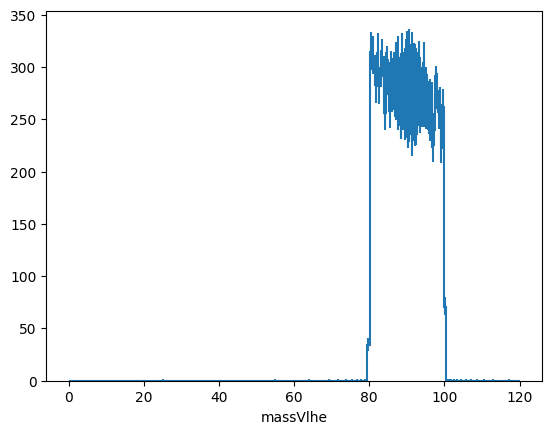

In [5]:
out['lhe_massVcosTheta'].get().project('massVlhe').plot()
print(out['lhe_massVcosTheta'].get().project('massVlhe')[0])
print(out['lhe_massVcosTheta'].get().project('massVlhe')[1])

In [6]:
out['lhe_massVcosTheta'].get().project('lheCosTheta')

Hist(Regular(50, -3.14159, 3.14159, name='lheCosTheta'), storage=Weight()) # Sum: WeightedSum(value=100000, variance=100000)

In [7]:
out['lhe_massVcosTheta_weakWeightZ'].get()[:,:,1].project('lheCosTheta')

Hist(Regular(50, -3.14159, 3.14159, name='lheCosTheta'), storage=Double()) # Sum: 101117.52819824219

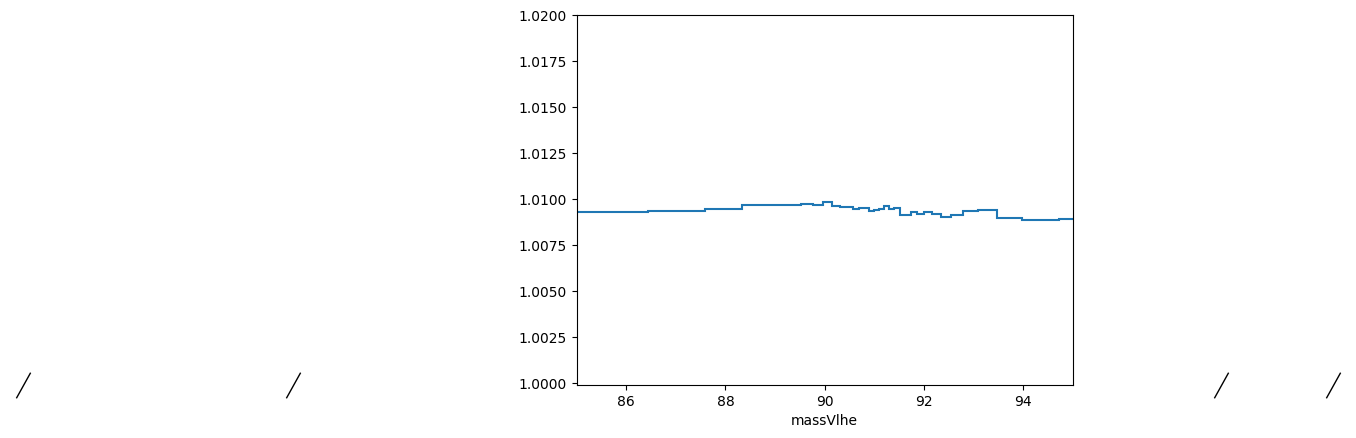

In [8]:
fig = plt.figure(figsize=(6.4, 4.8))
name = 'lhe_massVcosTheta_weakWeightZ'
axis = 'massVlhe'
binning = out['lhe_massVcosTheta_weakWeightZ'].get().axes['massVlhe'].edges[10:-10:10]
#print(binning)
def getHist(sample, name, axis, binning, weight):
    hproj = hh.rebinHist(res[sample]['output'][name].get()[:,:,weight].project(axis), axis, binning)
    widths = hproj.axes.widths.flatten()
    hproj /= widths[0]
    return hproj

hvar = getHist('Zmumu_powheg-weak', name, axis, binning, 2) # EW HO
hnom = getHist('Zmumu_powheg-weak', name, axis, binning, 0) # LO

hratio = hh.divideHists(hvar, hnom)
p = hratio.plot()
p[0].errorbar.remove()

plt.ylim(0.9999,1.02)
plt.xlim(85,95)

val_ho = hratio.values()

In [9]:
def getEWratio(var, nom):
    hvar = getHist('Zmumu_powheg-weak', name, axis, binning, var)
    hnom = getHist('Zmumu_powheg-weak', name, axis, binning, nom)
    hratio = hh.divideHists(hvar, hnom)
    return hratio.values()

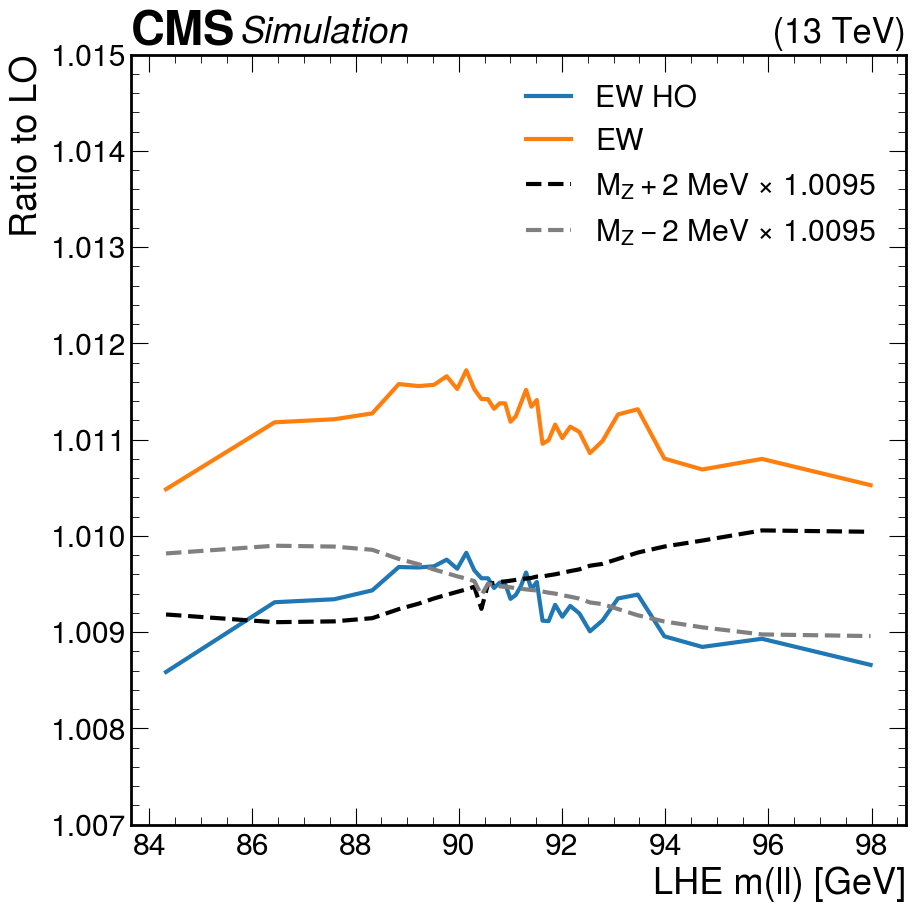

In [10]:
import mplhep as hep  # HEP (CMS) extensions/styling on top of mpl
hep.style.use("CMS")
plt.rcParams['lines.linewidth'] = 3

# EW order variations
plt.plot(binning[1:], getEWratio(2, 0), label = 'EW HO')
plt.plot(binning[1:], getEWratio(1, 0), label = 'EW')
mass_offset = 1.0095
plt.plot(binning[1:], getEWratio(7, 2)*mass_offset, label = fr'$M_Z+2$ MeV $\times$ {mass_offset}', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2)*mass_offset, label = fr'$M_Z-2$ MeV $\times$ {mass_offset}', linestyle='dashed', c='gray')
plt.legend()
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to LO")
plt.ylim(1.007,1.015)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

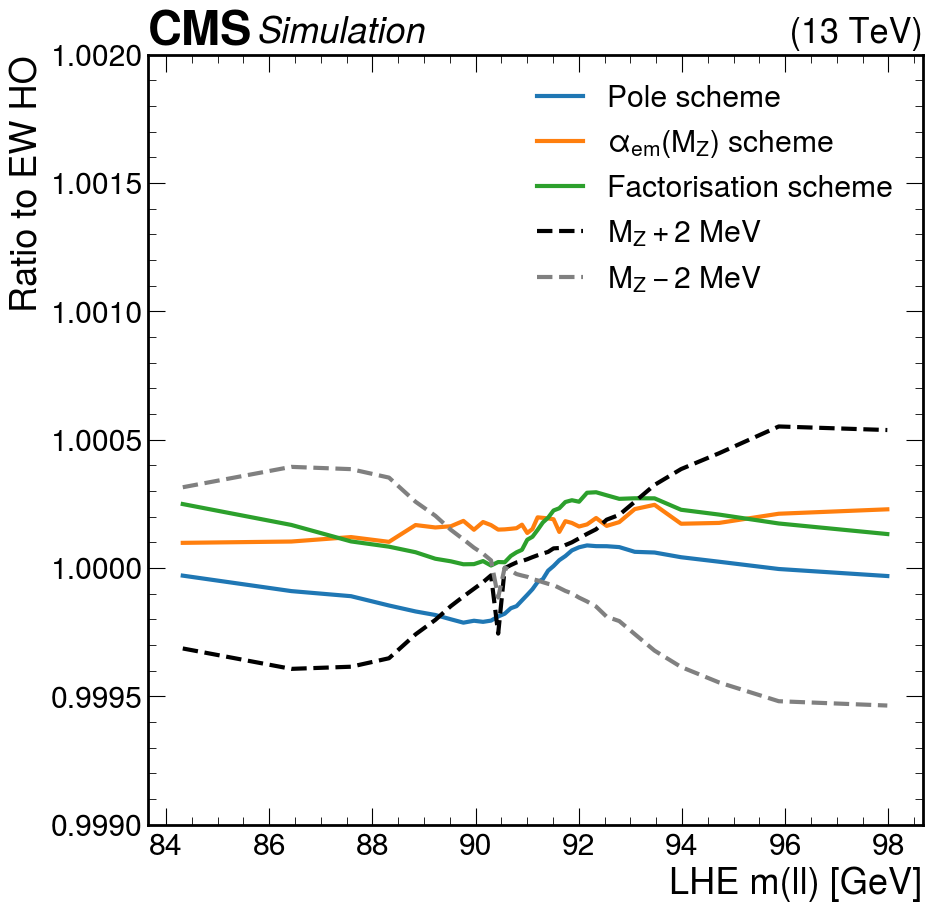

In [12]:
# EW scheme variations
#plt.plot(binning[1:], getEWratio(2, 0), label = 'EW HO / LO')
#plt.plot(binning[1:], getEWratio(1, 2), label = 'EW / EW HO')
plt.plot(binning[1:], getEWratio(3, 2), label = 'Pole scheme')
plt.plot(binning[1:], getEWratio(10, 2), label = r'$\alpha_{em}(M_Z)$ scheme')
plt.plot(binning[1:], getEWratio(11, 2), label = 'Factorisation scheme')
plt.plot(binning[1:], getEWratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend()
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

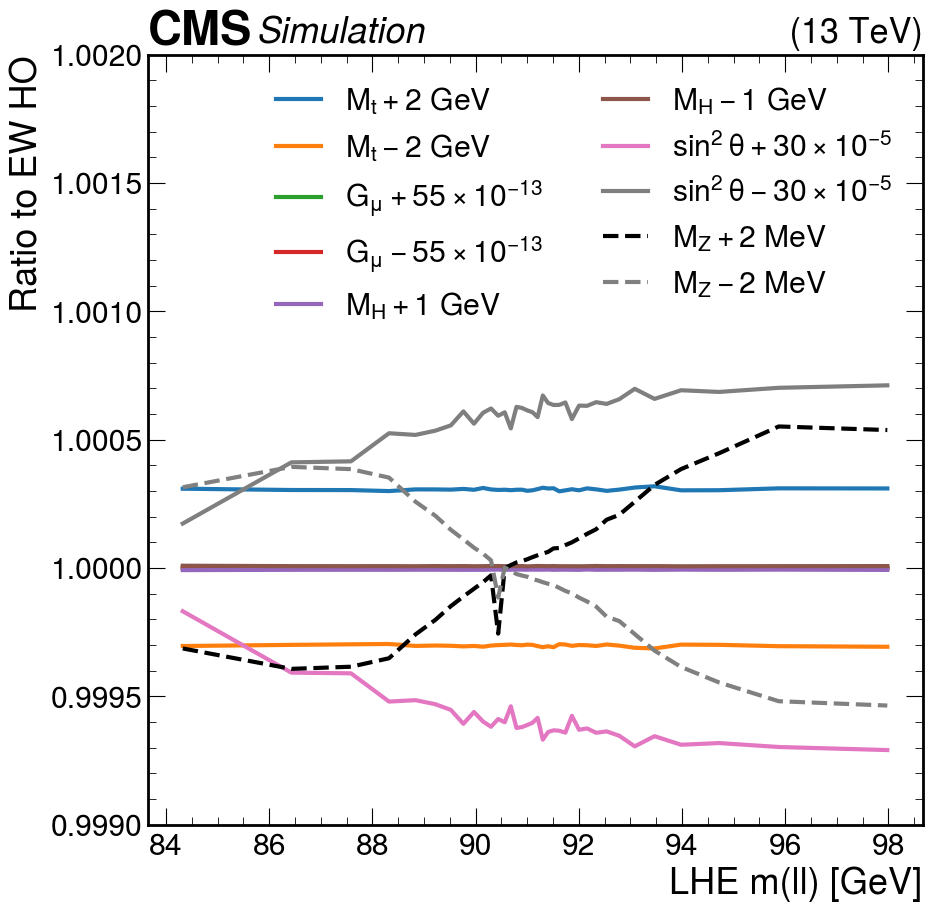

In [11]:
# EW parameter variations
plt.plot(binning[1:], getEWratio(5, 2), label = '$M_t+2$ GeV')
plt.plot(binning[1:], getEWratio(4, 2), label = '$M_t-2$ GeV')
plt.plot(binning[1:], getEWratio(9, 2), label = r'$G_\mu+55 \times 10^{-13}$')
plt.plot(binning[1:], getEWratio(8, 2), label = r'$G_\mu-55 \times 10^{-13}$')
plt.plot(binning[1:], getEWratio(13, 2), label = '$M_H+1$ GeV')
plt.plot(binning[1:], getEWratio(12, 2), label = '$M_H-1$ GeV')
plt.plot(binning[1:], getEWratio(17, 2), label = r'$\sin^2 \theta + 30 \times 10^{-5}$')
plt.plot(binning[1:], getEWratio(14, 2), label = r'$\sin^2 \theta - 30 \times 10^{-5}$')
plt.plot(binning[1:], getEWratio(7, 2), label = '$M_Z+2$ MeV', linestyle='dashed', c='black')
plt.plot(binning[1:], getEWratio(6, 2), label = '$M_Z-2$ MeV', linestyle='dashed', c='gray')
plt.legend(ncols=2)
plt.xlabel("LHE m(ll) [GeV]")
plt.ylabel("Ratio to EW HO")
plt.ylim(0.999,1.002)
hep.cms.label("", loc=0, ax=plt.gca())
plt.show()

In [ ]:
print('test')